# Count violations

Show the violations of a spec. Use this to investigate the features we use for learning of a visualization.

In [7]:
from draco.spec import Data
from draco.learn.helper import count_violations, compute_cost
import pandas as pd
from vega3 import VegaLite
from pprint import pprint

In [8]:
true = True
false = False

In [9]:
data_url = '../examples/data/cars.csv'
data = Data.from_csv(data_url)

spec1 = {
    "encoding": {
        'x': {
            'field': 'horsepower',
            'type': 'quantitative',
            "bin": True
        },
        "y": {
            "field": "acceleration",
            "type": "quantitative",
            "bin": True
        },
        "size": {
            "aggregate": "count",
            "type": "quantitative"
        }
    },
    "mark": "point"
}

spec2 = {
    "encoding": {
        'x': {
            'field': 'horsepower',
            'type': 'quantitative'
        },
        "y": {
            "field": "acceleration",
            "type": "quantitative"
        }
    },
    "mark": "point"
}

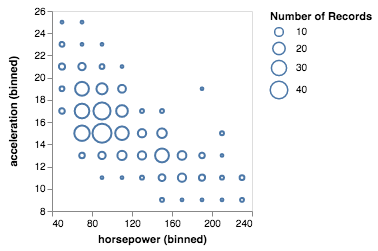

In [10]:
VegaLite(spec1, pd.read_csv(data_url))

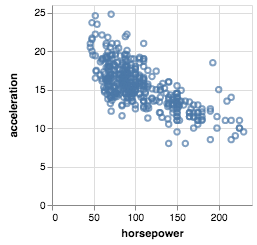

In [11]:
VegaLite(spec2, pd.read_csv(data_url))

In [13]:
def print_violations(spec):
    violations = count_violations(data, spec)
    print(compute_cost(violations))
    pprint(violations)    

print('First:')
print_violations(spec1)
print('\nSecond:')
print_violations(spec2)

INFO:draco.run:Command: clingo --outf=2 --warn=no-atom-undefined -n 0 /Users/domoritz/Developer/UW/draco/draco/../asp/define.lp /Users/domoritz/Developer/UW/draco/draco/../asp/features.lp /Users/domoritz/Developer/UW/draco/draco/../asp/output.lp /Users/domoritz/Developer/UW/draco/draco/../asp/count.lp /var/folders/g1/bvh0x71s0tg04jq6py_svvdh0000gp/T/tmp7e8hyyug


First:


INFO:draco.run:['mark(point)', 'aggregate(e10,count)', 'channel(e8,x)', 'channel(e9,y)', 'channel(e10,size)', 'field(e8,horsepower)', 'field(e9,acceleration)', 'type(e8,quantitative)', 'type(e9,quantitative)', 'type(e10,quantitative)', 'bin(e8,3)', 'bin(e8,5)', 'bin(e8,10)', 'bin(e8,100)', 'bin(e8,200)', 'bin(e9,3)', 'bin(e9,5)', 'bin(e9,10)', 'bin(e9,100)', 'bin(e9,200)']
INFO:draco.run:Command: clingo --outf=2 --warn=no-atom-undefined -n 0 /Users/domoritz/Developer/UW/draco/draco/../asp/define.lp /Users/domoritz/Developer/UW/draco/draco/../asp/features.lp /Users/domoritz/Developer/UW/draco/draco/../asp/output.lp /Users/domoritz/Developer/UW/draco/draco/../asp/count.lp /var/folders/g1/bvh0x71s0tg04jq6py_svvdh0000gp/T/tmpb4hvhpbf


50
{'aggregate': 1,
 'aggregate_count': 1,
 'bin': 2,
 'bin_high': 2,
 'bin_low': 2,
 'continuous_size': 1,
 'd_d_point': 1,
 'encoding': 3,
 'encoding_field': 2,
 'ordered_x': 1,
 'ordered_y': 1,
 'type_q': 3,
 'zero': 1,
 'zero_size': 1}

Second:


INFO:draco.run:['mark(point)', 'channel(e11,x)', 'channel(e12,y)', 'field(e11,horsepower)', 'field(e12,acceleration)', 'type(e11,quantitative)', 'type(e12,quantitative)']


18
{'c_c_point': 1,
 'continuous_x': 1,
 'continuous_y': 1,
 'encoding': 2,
 'encoding_field': 2,
 'type_q': 2,
 'zero': 2}
